### EE 421/521 Image Processing - Spring 2020-21

## Project 10 - Noise Filtering

#### Submission deadline: 03 May 2021

In this project, you will implement the following:

1. Bileteral noise filter

**This project will be graded for both EE 421 (HW7) and EE 521 (HW9) students.**

*Copyright (c) 2021 by Arif Tanju Erdem*

************************************
Neva Yaren Bulut
************************************

In [25]:
# import necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# array operations
import numpy as np

# signal processing operations
from scipy import signal

# mathematical calculations
import math

# random number generation
from scipy.stats import norm

In [26]:
# calculate the RMSE between two images

def my_RMSE(img1, img2):
    
    assert img1.ndim == img2.ndim
    assert img1.size == img2.size
    
    return math.sqrt(((img1 - img2)**2).sum() / img1.size)
    
# end of function

In [27]:
# my function for calculating a Gaussian kernel

def my_winGauss(M):

    assert M > 0
    
    # standard deviation of Gaussian
    sigma = 0.425 * M
    two_sigma_sqr = 2.0 * sigma * sigma
    
    # filter size
    L = int(np.ceil(3.0 * sigma))
    if L%2 == 0:
        L += 1

    win_Gauss = np.zeros(L)
    
    L_half = L//2
    for n in range(L):
        m = n - L_half
        win_Gauss[n] = math.exp(-m*m/two_sigma_sqr)
        
    return win_Gauss
    

In [28]:
# my function to convert to lumincance, round to nearest integer, 
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    dim_img = imgRGB.shape[2]    
    assert dim_img >= 3
    
    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

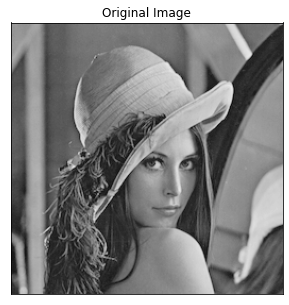

In [29]:
# set image folder
image_folder = r'D:\yeni\Dersler\EE421-imageprocessing\images'

# read input image 
image_file = r'/lena_256.png'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

if imgRGB.ndim >= 3:
    # calculate the luminance image
    imgLum = my_imgLuminance(imgRGB)
else:
    imgLum = imgRGB

plt.figure(figsize=(5,5))
plt.subplot(111), plt.imshow(imgLum, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.show()
plt.close()


In [30]:
M = 1.5
filterGauss = my_winGauss(M)
print("Filter Coefficients: ", filterGauss)
M = 2.5
filterGauss = my_winGauss(M)
print("Filter Coefficients: ", filterGauss)
M = 4.5
filterGauss = my_winGauss(M)
print("Filter Coefficients: ", filterGauss)

Filter Coefficients:  [0.29220606 1.         0.29220606]
Filter Coefficients:  [0.1700562 0.6421672 1.        0.6421672 0.1700562]
Filter Coefficients:  [0.29220606 0.57880003 0.87223224 1.         0.87223224 0.57880003
 0.29220606]


In [39]:
# STEP 1 Write a function to implement bilateral filtering

# ADD YOUR CODE HERE

# for every pixel:
#     calculate smoothing weight (depending on distance in location)
#     calculate range weight (depending on difference in amplitude)
#     combine the above two weights to determine local filter coeffificents
#     apply the filter over the local window

def distance(i, j):
    return np.absolute(i-j)

def bilateral_filter(imgLum,windowSize):
    M = windowSize/2
    filterGauss = my_winGauss(M)
    
    filterGauss2D = np.outer(filterGauss, filterGauss)
    filterGauss2D /= filterGauss2D.sum()
    # filter noisy image
    imgFilteredLSI = signal.convolve2d(imgNoisy, filterGauss2D, mode='same', boundary='fill', fillvalue=128)
    
#I could not finish the function.

PSNR = 20.00 -> Noise Std. Dev. = 25.50


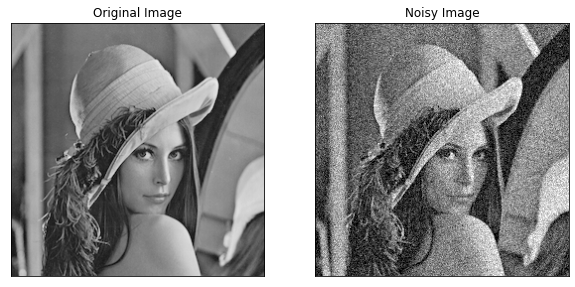

In [40]:
# STEP 2 Add noise to your input image

# ADD YOUR CODE HERE

# get image size
size = imgLum.shape

# choose PSNR value (use 20 dB for submitting the homework)

# Gaussian noise parameters
noise_Mean = 0.0
PSNR = 20.0
noise_Std = 255.0 / (10.0 ** (PSNR/20.0))
print('PSNR = {:.2f} -> Noise Std. Dev. = {:.2f}'.format(PSNR, noise_Std))


# add noise with the specified PSNR

# add Gaussian noise to image
imgNoisy = imgLum + norm.rvs(noise_Mean, noise_Std, size)


# calculate and print the RMSE between the original and noisy images

# calculate noise error
rmse_Noisy = my_RMSE(imgLum, imgNoisy)

# display original and noisy images
plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(imgLum, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.subplot(122), plt.imshow(imgNoisy, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('Noisy Image')
plt.show()
plt.close()

TypeError: Image data of dtype object cannot be converted to float

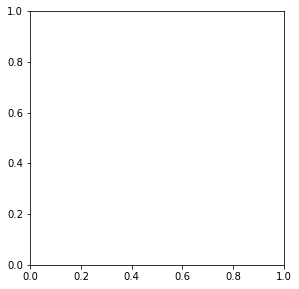

In [42]:
# STEP 3 Filter the noisy image with a bileteral filter

# ADD YOUR CODE HERE

# choose a filtering window size (for the homework use 3x3, 5x5 and 7x7 windows)

# call your function to apply the bileteral filter
a=bilateral_filter(imgNoisy,3)
plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.show()
plt.close()
####I wrote the display but function is not complete so it does not work.

# calculate and print the RMSE between the original and filtered images

# display original, noisy and filtered images


*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

Comment on the performance of the bileteral filter. Do you observe its edge preserving characteristic?

The bilateral filter is a non-linear technique that can blur an image while respecting strong edges.The bilateral ﬁlter smooths an input image while preserving its edges. 
